In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the output file #
df = pd.read_csv("outputs/hercules_output.csv", index_col=False)
df.head()

# Print out the column names of the output
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.002',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.003',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.004',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.005',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.006',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.007',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.008',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.009',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.002',
  

Text(0.5, 0, 'time [hr]')

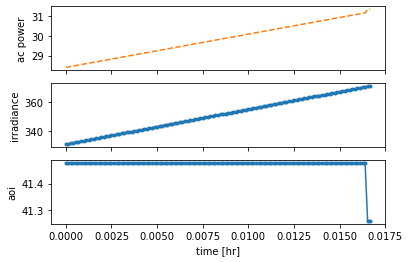

In [3]:
# first test solar module outputs
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

# Define solar output signals from output data
if "external_signals.solar_power_reference_mw" in df.columns:
    power_setpoint = df["external_signals.solar_power_reference_mw"]
ac_power = df["py_sims.solar_farm_0.outputs.power_mw"]
# dc_power = df["py_sims.solar_farm_0.outputs.dc_power_mw"]
aoi = df["py_sims.solar_farm_0.outputs.aoi"]
irradiance = df["py_sims.solar_farm_0.outputs.dni"]

# Plot solar variables
fig, ax = plt.subplots(3, 1, sharex="col")  # , figsize=[6,5], dpi=250)

if "external_signals.solar_power_reference_mw" in df.columns:
    ax[0].plot(time / 3600, power_setpoint, "-", linewidth=1, label='setpoint', color="C0")
ax[0].plot(time / 3600, ac_power, "--", label="power", color="C1")
ax[0].set_ylabel("ac power")
# ax[0].legend()

# ax[1].plot(time / 3600, dc_power, ".-", label="dc power")
# ax[1].set_ylabel("dc power")

ax[1].plot(time / 3600, irradiance, ".-", label="irradiance")
ax[1].set_ylabel("irradiance")
# ax[1].legend()

ax[2].plot(time / 3600, aoi, ".-", label="aoi")
ax[2].set_ylabel("aoi")
ax[-1].set_xlabel("time [hr]")

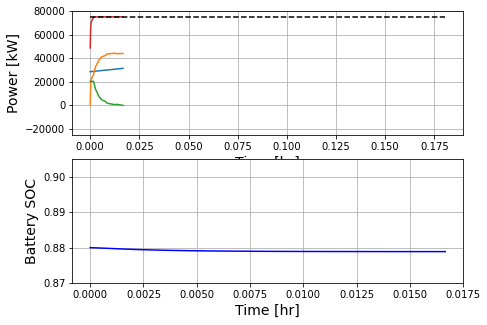

In [5]:
# Plot all plant outputs

# Load power reference signal given to the plant
power_ref_input = pd.read_csv("plant_power_reference.csv")

# Calculate total power output of the farm
power_output = (df["py_sims.inputs.available_power"]+\
    df["py_sims.solar_farm_0.outputs.power_mw"]*1000) \
    - df["py_sims.battery_0.outputs.power"]

#####
# # Uncomment if you want to look at individual turbine powers
# plt.figure()
# Nturb = 10
# for i in range(0,Nturb):
#     ending = "00"+str(i)
#     turbine_string = "hercules_comms.amr_wind.wind_farm_0.turbine_powers."+ending
#     plt.plot(time / 3600, df[turbine_string], label="WT"+ending)

# plt.ylabel("Power [kW]")
# plt.xlabel("Time [hr]")
# plt.legend()
#####

# Plotting power outputs from each technology as well as the total power output (top)
# Plotting the SOC of the battery (bottom)
plt.figure(figsize=(7,5))
top = plt.subplot(2,1,1)

top.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="solar PV")
top.plot(time / 3600, df["py_sims.inputs.available_power"], label="wind power")
top.plot(time / 3600, -df["py_sims.battery_0.outputs.power"], label="battery")
top.plot(time / 3600, power_output, label="power output")
top.plot(power_ref_input['time']/ 3600, power_ref_input['plant_power_reference'],\
            'k--', label="Power Reference")

top.set_ylabel("Power [kW]", fontsize = 14)
top.set_xlabel("Time [hr]", fontsize = 14)
# top.legend( fontsize = 11, loc='best')
top.set_ylim([ -25000, 80000])
top.grid()

bot = plt.subplot(2,1,2)
bot.plot(time / 3600, df["py_sims.battery_0.outputs.soc"], 'b')

bot.set_ylabel("Battery SOC", fontsize = 14)
bot.set_xlabel("Time [hr]", fontsize = 14)
bot.set_ylim([0.87,0.905])
bot.grid()



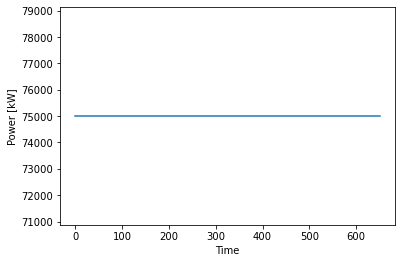

In [6]:
# Create the power reference file for input to Hercules plant

# Set power reference signal
power_value = 75000 # in kW
plant_power_reference = power_value*np.ones(203)

# Set time step
time = np.linspace(101.0, 650.0, num=200)
time = np.insert(time, 0, 100.0)
time = np.insert(time, 0,  10.0)
time = np.insert(time, 0, 0.0)

# Plot power reference signal for visual check

plt.figure()
plt.plot(time, plant_power_reference)
plt.ylabel("Power [kW]")
plt.xlabel("Time")
zipped = np.transpose([time, plant_power_reference])

#####
# # Uncomment these lines to save the power reference file as a csv file
# np.savetxt("plant_power_reference.csv", zipped, fmt='%1.4e', \
# delimiter=',', header="time,plant_power_reference", comments="")

# # Use this if you only want to give power reference to the wind farm
# np.savetxt("plant_power_reference.csv", zipped, fmt='%1.4e', \
# delimiter=',', header="time,wind_power_reference", comments="")
#####


